In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

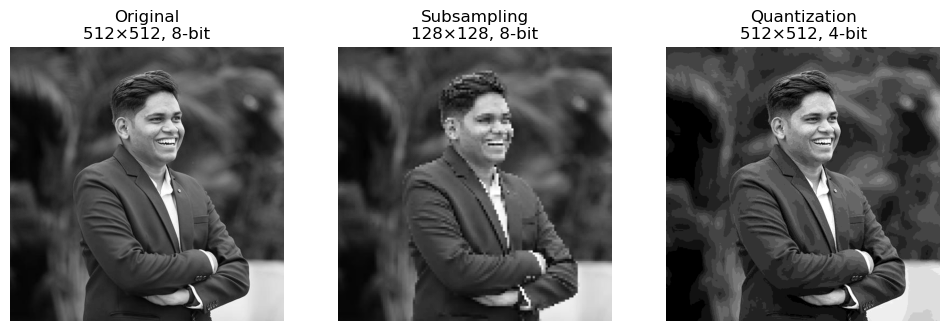

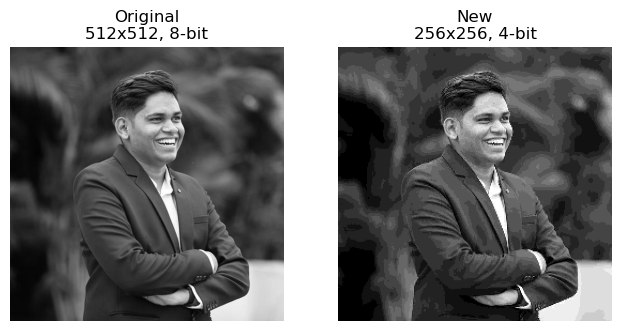

In [9]:
# Load image (change filename if needed)
img = cv2.imread("Image2_gray.jpg", cv2.IMREAD_GRAYSCALE)

def scale_nearest_inverse(image, scale):
    H, W = image.shape
    new_H = int(H * scale)
    new_W = int(W * scale)

    scaled_img = np.zeros((new_H, new_W))

    for i in range(new_H):
        for j in range(new_W):
            # Inverse mapping
            x = int(i / scale)
            y = int(j / scale)

            # Boundary check
            x = min(x, H - 1)
            y = min(y, W - 1)

            scaled_img[i, j] = image[x, y]

    return scaled_img

# Downscale and upscale
downscaled = scale_nearest_inverse(img, 0.25)   # 128x128

# 4-bit quantization
quantized_4bit = np.floor(img / 16).astype(np.uint8)

plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.imshow(img, cmap='gray')
plt.title("Original\n512×512, 8-bit")
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(downscaled, cmap='gray')
plt.title("Subsampling\n128×128, 8-bit")
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(quantized_4bit, cmap='gray')
plt.title("Quantization\n512×512, 4-bit")
plt.axis('off')

plt.show()


# Downscale and upscale
downscaled2 = scale_nearest_inverse(img, 0.5)   # 256x256
quantized_4bit_new = np.floor(downscaled2 / 16).astype(np.uint8)

plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.imshow(img, cmap='gray')
plt.title("Original\n512x512, 8-bit")
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(quantized_4bit_new, cmap='gray')
plt.title("New\n256x256, 4-bit")
plt.axis('off')

plt.show()

